# Python AI: How to Build a Neural Network & Make Predictions

# Neural Networks: Main Concepts

In [23]:
import numpy as np

# Making Your First Prediction
Since this is your very first neural network, you’ll keep things straightforward and build a network with only two layers. So far, you’ve seen that the only two operations used inside the neural network were the dot product and a sum. Both are linear operations.

If you add more layers but keep using only linear operations, then adding more layers would have no effect because each layer will always have some correlation with the input of the previous layer. This implies that, for a network with multiple layers, there would always be a network with fewer layers that predicts the same results.

What you want is to find an operation that makes the middle layers sometimes correlate with an input and sometimes not correlate.

You can achieve this behavior by using nonlinear functions. These nonlinear functions are called activation functions. There are many types of activation functions. The ReLU (rectified linear unit), for example, is a function that converts all negative numbers to zero. This means that the network can “turn off” a weight if it’s negative, adding nonlinearity.

The network you’re building will use the sigmoid activation function. You’ll use it in the last layer, layer_2. The only two possible outputs in the dataset are 0 and 1, and the sigmoid function limits the output to a range between 0 and 1. This is the formula to express the sigmoid function:

Sigmoid function formula
Sigmoid function formula
The e is a mathematical constant called Euler’s number, and you can use np.exp(x) to calculate eˣ.

Probability functions give you the probability of occurrence for possible outcomes of an event. The only two possible outputs of the dataset are 0 and 1, and the Bernoulli distribution is a distribution that has two possible outcomes as well. The sigmoid function is a good choice if your problem follows the Bernoulli distribution, so that’s why you’re using it in the last layer of your neural network.

Since the function limits the output to a range of 0 to 1, you’ll use it to predict probabilities. If the output is greater than 0.5, then you’ll say the prediction is 1. If it’s below 0.5, then you’ll say the prediction is 0. This is the flow of the computations inside the network you’re building:



In [24]:

# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")


The prediction result is: [0.7985731]


# Train Your First Neural Network
In the process of training the neural network, you first assess the error and then adjust the weights accordingly. To adjust the weights, you’ll use the gradient descent and backpropagation algorithms. Gradient descent is applied to find the direction and the rate to update the parameters.

Before making any changes in the network, you need to compute the error. That’s what you’ll do in the next section.

Computing the Prediction Error
To understand the magnitude of the error, you need to choose a way to measure it. The function used to measure the error is called the cost function, or loss function. In this tutorial, you’ll use the mean squared error (MSE) as your cost function. You compute the MSE in two steps:

Compute the difference between the prediction and the target.
Multiply the result by itself.
The network can make a mistake by outputting a value that’s higher or lower than the correct value. Since the MSE is the squared difference between the prediction and the correct result, with this metric you’ll always end up with a positive value.

This is the complete expression to compute the error for the last previous prediction:

In [26]:
target =0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.7985731]; Error: [0.637719]


In [27]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")


The derivative is [1.59714621]


In [29]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")
Prediction: [0.01496248]; Error: [0.00022388]

Prediction: [0.00013525]; Error: [1.8293616e-08]


In [11]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)

In [21]:
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.021962854160594184

# Creating the Neural Network Class
Now you know how to write the expressions to update both the weights and the bias. It’s time to create a class for the neural network. Classes are the main building blocks of object-oriented programming (OOP). The NeuralNetwork class generates random start values for the weights and bias variables.

When instantiating a NeuralNetwork object, you need to pass the learning_rate parameter. You’ll use predict() to make a prediction. The methods _compute_derivatives() and _update_parameters() have the computations you learned in this section. This is the final NeuralNetwork class:

In [30]:
class NeuralNetwork:
    # ...
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

### There’s a lot going on in the above code block, so here’s a line-by-line breakdown:


first picks a random instance from the dataset.

then calculate the partial derivatives and return the derivatives for the bias and the weights. They use _compute_gradients(), which you defined earlier.

updates the bias and the weights using _update_parameters(), which you defined in the previous code block.

checks if the current iteration index is a multiple of 100. You do this to observe how the error changes every 100 iterations.

starts the loop that goes through all the data instances.

computes the prediction result.


computes the error for every instance.
then you accumulate the sum of the errors using the cumulative_error variable. You do this because you want to plot a point with the error for all the data instances. Then, on line 32, you append the error to cumulative_errors, the array that stores the errors. You’ll use this array to plot the graph.

In short, you pick a random instance from the dataset, compute the gradients, and update the weights and the bias. You also compute the cumulative error every 100 iterations and save those results in an array. You’ll plot this array to visualize how the error changes during the training process.

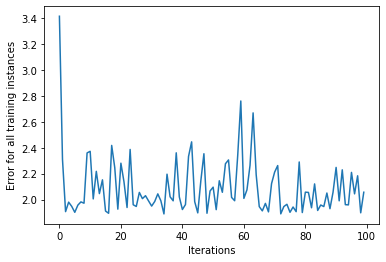

In [31]:
import matplotlib.pyplot as plt
input_vectors = np.array(
      [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
         [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
     ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")

The overall error is decreasing, which is what you want. The image is generated in the same directory where you’re running IPython. After the largest decrease, the error keeps going up and down quickly from one interaction to another. That’s because the dataset is random and very small, so it’s hard for the neural network to extract any features.

But it’s not a good idea to evaluate the performance using this metric because you’re evaluating it using data instances that the network already saw. This can lead to overfitting, when the model fits the training dataset so well that it doesn’t generalize to new dat

# Thank you
# Author

<a href="https://www.linkedin.com/in/muhammad-bilal-88a685259/">MUHAMMAD BILAL</a>